In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
plt.rcParams['figure.figsize'] = 7,4

In [2]:
iris = datasets.load_iris()

In [3]:
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names

In [4]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [5]:
iris_df = pd.DataFrame(iris.data)

iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

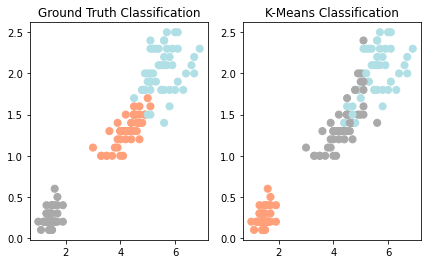

In [6]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x = iris_df.Petal_Length, y=iris_df.Petal_Width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x = iris_df.Petal_Length, y=iris_df.Petal_Width,c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

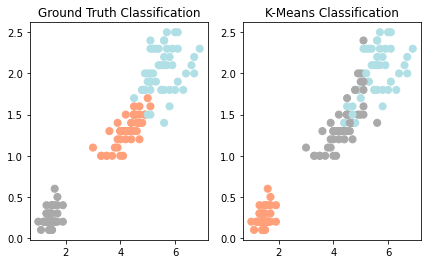

In [7]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x = iris_df.Petal_Length, y=iris_df.Petal_Width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x = iris_df.Petal_Length, y=iris_df.Petal_Width,c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')

In [8]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150



In [9]:
## Precision : a measure of the model's relevancy

## Recall : a measure of the model's completeness

## K decide using Elbow method

In [10]:
Iris = datasets.load_iris()

In [11]:
Iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
Iris_df = pd.DataFrame(Iris.data, columns = Iris.feature_names)
Iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
Iris_df.shape

(150, 4)

In [15]:
##finding optimal clusters

x = Iris_df.values
from sklearn.cluster import KMeans
wcss = []

for i in range(1,12):
    model = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300,n_init=10,random_state=0)
    model.fit(x)
    wcss.append(model.inertia_)

Text(0, 0.5, 'WCSS')

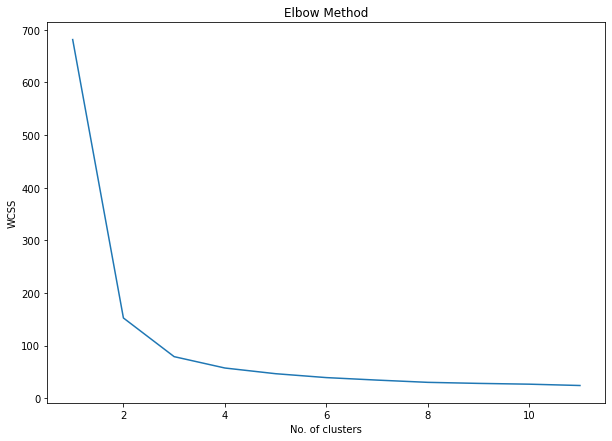

In [16]:
plt.figure(figsize=(10,7))
plt.plot(range(1,12), wcss)
plt.title("Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")

## Elbow Method
    From above graph the optimum clusters is where the elbow occurs. This is when "WHITHIN CLUSTER SUM of SQUARES" doesn't decrease with every iteration.
    
Choose no. of cluster = 3